In [ ]:
library(datasets)


In [ ]:
library(factoextra)
library(cluster)
library(factoextra)


In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


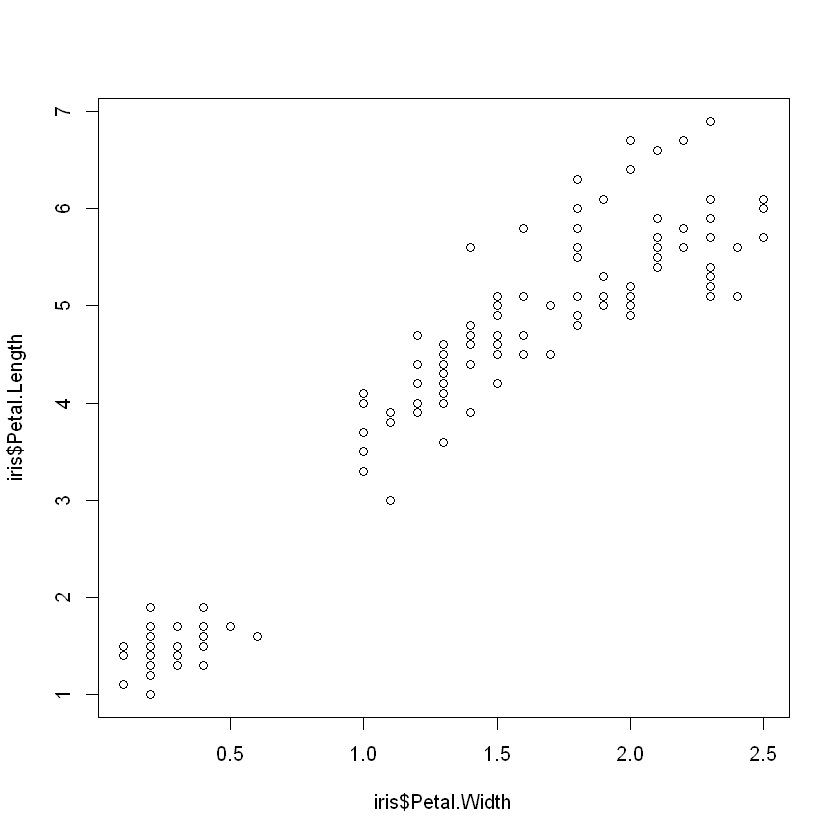

In [2]:
plot(x=iris$Petal.Width, y = iris$Petal.Length)

In [3]:
# qua trực quan ban đầu, ta thấy dataset chia làm 2 cụm 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [6]:
library(factoextra)
library(cluster)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [9]:
# ktra xem dataset có khả năng phân cụm hay ko
res = get_clust_tendency(iris[, 3:4], n=nrow(iris[,3:4])-1, graph = TRUE)
res$hopkins_stat



Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 0.8347945

In [10]:
# > 0.5 => có khả năng phân cụm

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

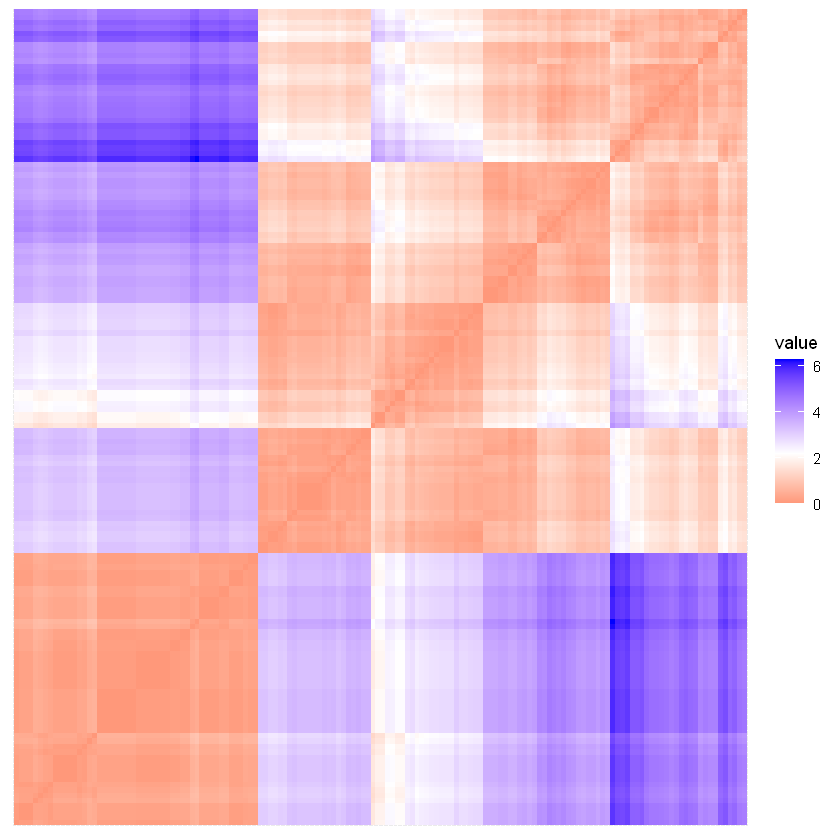

In [11]:
res$plot

In [12]:
# nhìn hình thì nó phân ra làm 2 cụm (thậm chí là 3 cụm nếu căng mắt ra nhìn :))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [14]:
# tính wss cho dataset (1 cụm 2 thuộc tính)
wss = (nrow(iris) -1) * sum(apply(iris[,3:4], 2, var))
wss

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 550.8953

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 550.89533  86.39022  31.37136  19.46599  13.91691  11.02515


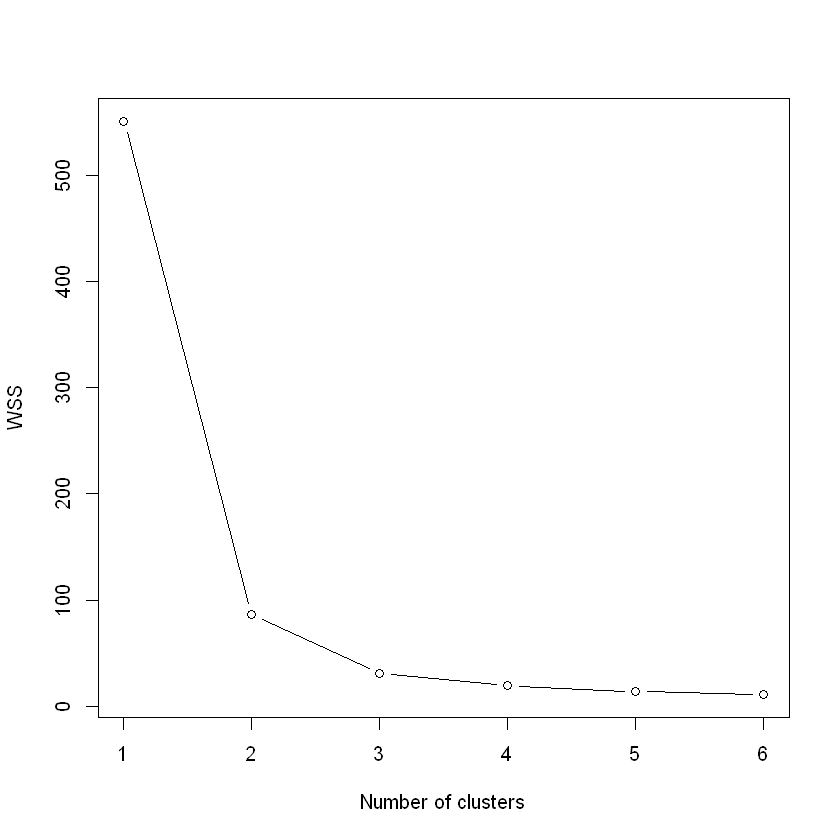

In [20]:
# chọn k phù hợp
for (i in 1:6) wss[i] = sum(kmeans(iris[, 3:4],
                        centers = i,
                        nstart = 20)$withinss
)
print(wss)

plot(1:6, wss, type = 'b', xlab='Number of clusters', ylab='WSS')

In [21]:
# => chọn k = 3 là hợp lý do từ 4 trở đi, giá trị wss giảm khá mịn

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [22]:
set.seed(42)
irisCluster = kmeans(iris[,3:4], centers = 3, nstart=20)
irisCluster

K-means clustering with 3 clusters of sizes 50, 48, 52

Cluster means:
  Petal.Length Petal.Width
1     1.462000    0.246000
2     5.595833    2.037500
3     4.269231    1.342308

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 2 2 2 2
[112] 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1]  2.02200 16.29167 13.05769
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [23]:
print(irisCluster$centers)

  Petal.Length Petal.Width
1     1.462000    0.246000
2     5.595833    2.037500
3     4.269231    1.342308


In [25]:
compare = table(irisCluster$cluster, iris$Species)
compare

   
    setosa versicolor virginica
  1     50          0         0
  2      0          2        46
  3      0         48         4

In [26]:
library(factoextra)

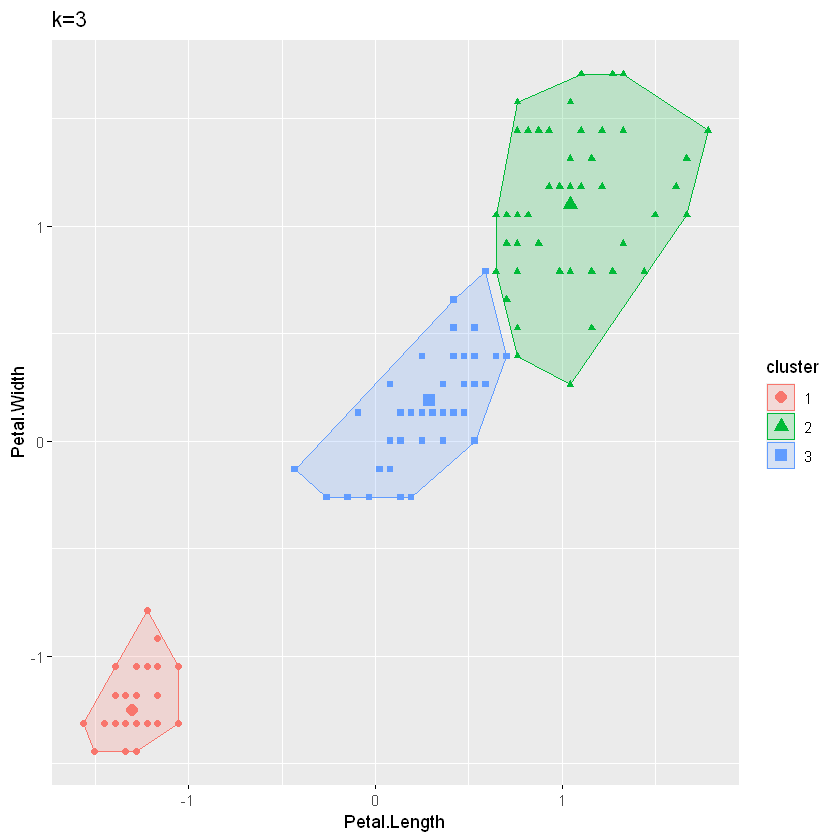

In [28]:
# có scale dữ liệu (dùng standard)
fviz_cluster(irisCluster, geom = 'point', data = iris[, 3:4]) + ggtitle('k=3')

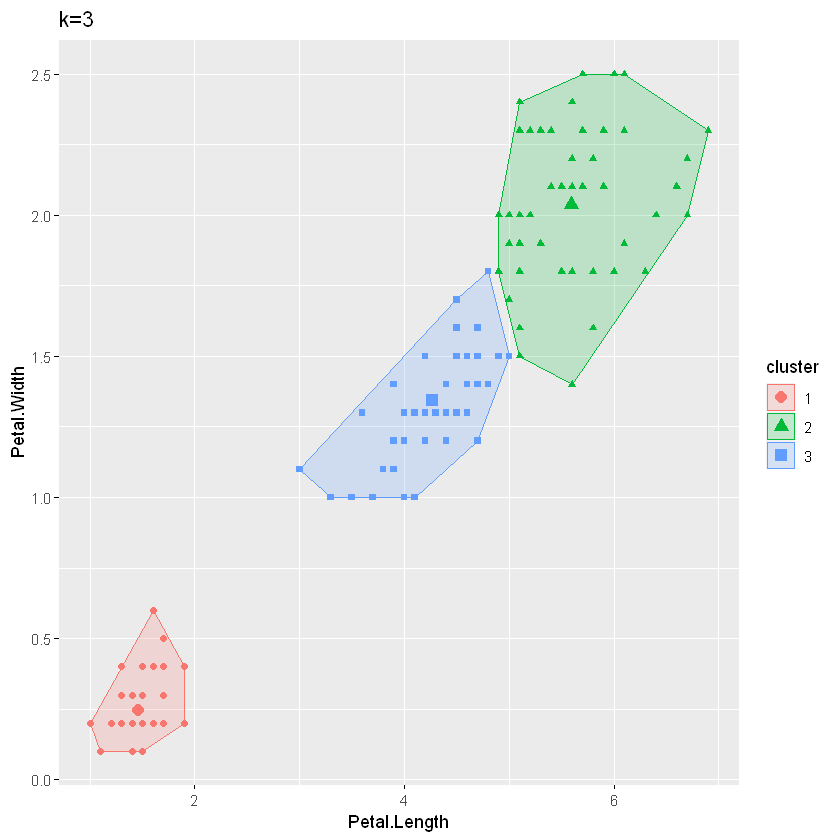

In [29]:
# ko scale dữ liệu
fviz_cluster(irisCluster, geom = 'point', data = iris[, 3:4], stand=F) + ggtitle('k=3')

In [30]:
# make new prediction
newdata = data.frame(Petal.Length = c(1.45, 3.45, 5.25),  
                      Petal.Width = c(0.25, 1.45, 2.35))
newdata


Petal.Length,Petal.Width
<dbl>,<dbl>
1.45,0.25
3.45,1.45
5.25,2.35


### **prediction**

In [31]:
# Solution 1
predict.kmeans <- function(object, newdata){
    centers <- object$centers
    n_centers <- nrow(centers)
    dist_mat <- as.matrix(dist(rbind(centers, newdata)))
    dist_mat <- dist_mat[-seq(n_centers), seq(n_centers)]
    max.col(-dist_mat)
}

res = predict.kmeans(irisCluster, newdata)
res

In [ ]:
library('clue')

In [35]:
# Solution 2
library('clue')


ERROR: Error in library("clue"): there is no package called 'clue'


In [39]:
cl_predict(irisCluster, newdata = newdata)

Class ids:
[1] 1 3 2